/Users/chengjunyuan/miniconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/chengjunyuan/miniconda3/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/Users/chengjunyuan/miniconda3/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


ImageContainer[shape=(1000, 1000), layers=['image', 'image_smooth', 'segmented_watershed']]
Number of segments in crop: 1182


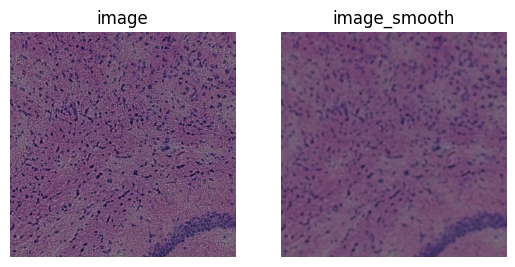

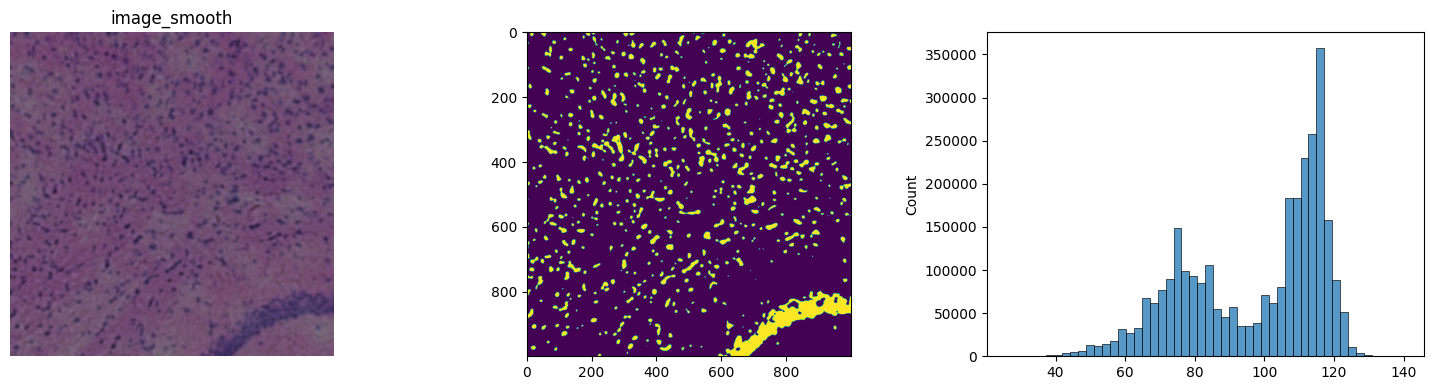

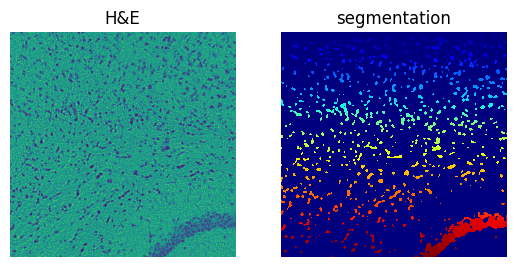

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import squidpy as sq

# load the H&E stained tissue image and crop to a smaller segment
img = sq.datasets.visium_hne_image_crop()
crop = img.crop_corner(0, 0, size=1000)

# smooth image
sq.im.process(crop, layer="image", method="smooth", sigma=4)

# plot the result
fig, axes = plt.subplots(1, 2)
for layer, ax in zip(["image", "image_smooth"], axes):
    crop.show(layer, ax=ax)
    ax.set_title(layer)
    
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
crop.show("image_smooth", cmap="gray", ax=axes[0])
axes[1].imshow(crop["image_smooth"][:, :, 0, 0] < 90)
_ = sns.histplot(np.array(crop["image_smooth"]).flatten(), bins=50, ax=axes[2])
plt.tight_layout()

sq.im.segment(img=crop, layer="image_smooth", method="watershed", thresh=90, geq=False)

print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_watershed']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("H&E")
crop.show("segmented_watershed", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

In [ ]:
img

In [ ]:
crop

In [ ]:
test = sq.im.ImageContainer.load("CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_tissue_image.tif")
test_crop = test.crop_corner(0, 0, size=1000)

In [ ]:
test_img

In [ ]:
test_crop

In [ ]:
# load the H&E stained tissue image and crop to a smaller segment
img = sq.datasets.visium_hne_image_crop()
crop = img.crop_corner(0, 0, size=1000)

# smooth image
sq.im.process(crop, layer="image", method="smooth", sigma=4)

# plot the result
fig, axes = plt.subplots(1, 2)
for layer, ax in zip(["image", "image_smooth"], axes):
    crop.show(layer, ax=ax)
    ax.set_title(layer)

In [ ]:
img_new = sq.im.ImageContainer.load("CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_tissue_image.tif")
img_new

In [ ]:
img = sq.datasets.visium_hne_image_crop()
img

In [ ]:
# load the H&E stained tissue image and crop to a smaller segment
img_new = sq.im.ImageContainer.load("Xenium_V1_humanLung_Cancer_FFPE_he_image.ome.tif")
crop = img_new.crop_corner(0, 0, size=1000)

# smooth image
sq.im.process(crop, layer="image", method="smooth", sigma=4)

# plot the result
fig, axes = plt.subplots(1, 2)
for layer, ax in zip(["image", "image_smooth"], axes):
    crop.show(layer, ax=ax)
    ax.set_title(layer)
    
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
crop.show("image_smooth", cmap="gray", ax=axes[0])
axes[1].imshow(crop["image_smooth"][:, :, 0, 0] < 90)
_ = sns.histplot(np.array(crop["image_smooth"]).flatten(), bins=50, ax=axes[2])
plt.tight_layout()

sq.im.segment(img=crop, layer="image_smooth", method="watershed", thresh=230, geq=False)

print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_watershed']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("H&E")
crop.show("segmented_watershed", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

In [ ]:
ls

In [ ]:
# Code Credit: https://stackoverflow.com/a/10404957

import numpy as np
from PIL import Image
import matplotlib.pyplot as pyplot

def make_grayscale(image_path):
    img = Image.open(image_path)
    img.getdata()
    r, g, b = img.split()
    ra, ga, ba = np.array(r), np.array(g), np.array(b)
    gray = ((0.299 * ra) + (0.587 * ga) + (0.114 * ba))
    return gray

def print_grayscale(grayscale_values):
    pyplot.figure()
    pyplot.imshow(grayscale_values, cmap="gray")


In [ ]:
image_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif"
print_grayscale(make_grayscale(image_path))

In [ ]:
# Code Credit: ChatGPT 3.5

import os
from PIL import Image

image_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif"

def rotate_and_save(filepath):
    # Get the directory path of the Jupyter notebook
    notebook_dir = os.path.dirname(os.path.abspath("__file__"))
    
    # Create a folder with the same name as the filepath
    folder_name = os.path.join(notebook_dir, os.path.splitext(os.path.basename(filepath))[0])
    os.makedirs(folder_name, exist_ok=True)
    
    # Load the image
    try:
        image = Image.open(filepath)
    except FileNotFoundError:
        print("File not found.")
        return
    
    for degree in [0, 90, 180, 270]:
        rotated_image = image.rotate(degree)
        new_os_pathname = os.path.basename(filepath)[:-4] + f"_r{degree}.tif"
        rotated_image_path = os.path.join(folder_name, new_os_pathname)
        
        rotated_image.save(rotated_image_path)
    
    print(f"Rotated images saved at: {filepath}")

# Example usage:
rotate_and_save(image_path)

In [ ]:
# Code Credit: ChatGPT 3.5

from PIL import Image

def nested_list_to_image(nested_list):
    # Calculate the dimensions of the image
    height = len(nested_list)
    width = len(nested_list[0])

    # Create a new blank image
    img = Image.new("L", (width, height))

    # Iterate through the nested list and set pixel values
    for y in range(height):
        for x in range(width):
            pixel_value = nested_list[y][x]
            img.putpixel((x, y), pixel_value)

    return img

# Example nested list representing pixel intensities
nested_list = [
    [0, 255, 0],
    [255, 0, 255],
    [0, 255, 0]
]

# Convert nested list to Image object
image = nested_list_to_image(nested_list)

# Display the image
image.show()


In [ ]:
# Code Credit: ChatGPT 3.5

from PIL import Image

def mirror_image(image, direction):
    # Mirror horizontally
    if direction == 'horizontal':
        mirrored_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    # Mirror vertically
    elif direction == 'vertical':
        mirrored_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    else:
        raise ValueError("Invalid direction. Use 'horizontal' or 'vertical'.")
    
    return mirrored_image

# Load the image
image = Image.open(image_path)

# Mirror the image horizontally
mirrored_horizontal = mirror_image(image, 'horizontal')
mirrored_horizontal.show()

# Mirror the image vertically
mirrored_vertical = mirror_image(image, 'vertical')
mirrored_vertical.show()

In [5]:
# Code Sources:
# (1) https://stackoverflow.com/a/10404957
# (2) ChatGPT 3.5

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as pyplot

# VERY DANGEROUS NEXT STEP
#########################################
Image.MAX_IMAGE_PIXELS = None # DANGEROUS
#########################################

fiducial_frame_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif"
high_res_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_tissue_image.tif"

def make_grayscale(filepath):
    img = Image.open(filepath)
    img.getdata()
    r, g, b = img.split()
    ra, ga, ba = np.array(r), np.array(g), np.array(b)
    grayscale_as_list = ((0.299 * ra) + (0.587 * ga) + (0.114 * ba))
    return grayscale_as_list

def print_grayscale(grayscale_values):
    pyplot.figure()
    pyplot.imshow(grayscale_values, cmap="gray")
    
def grayscale_to_image(grayscale_values):
    height, width = len(grayscale_values), len(grayscale_values[0])
    img = Image.new("L", (width, height))

    # Iterate through the nested list and set pixel values
    for y in range(height):
        for x in range(width):
            pixel_value = round(grayscale_values[y][x])
            img.putpixel((x, y), pixel_value)

    return img

def image_production(filepath):
    grayscale_image = grayscale_to_image(make_grayscale(filepath))
    mirrored_grayscale = grayscale_image.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
    
    # Get the directory path of the Jupyter notebook
    notebook_dir = os.path.dirname(os.path.abspath("__file__"))
    
    # Create a folder with the same name as the filepath
    folder_name = os.path.join(notebook_dir, os.path.splitext(os.path.basename(filepath))[0])
    os.makedirs(folder_name, exist_ok=True)
    
    for degree in [0, 90, 180, 270]:
        rotated_image = grayscale_image.rotate(degree)
        new_os_pathname = os.path.basename(filepath)[:-4] + f"_original_r{degree}.tif"
        rotated_image_path = os.path.join(folder_name, new_os_pathname)
        
        rotated_mirrored_image = mirrored_grayscale.rotate(degree)
        new_os_pathname = os.path.basename(filepath)[:-4] + f"_mirrored_r{degree}.tif"
        rotated_mirrored_image_path = os.path.join(folder_name, new_os_pathname)
        
        rotated_image.save(rotated_image_path)
        rotated_mirrored_image.save(rotated_mirrored_image_path)
        
    print(f"Rotated images saved at: {filepath[:-4]}")

In [6]:
image_production("output_image.tif")

Rotated images saved at: output_image


In [ ]:
def get_scale(fidpath, hrpath):
    fid = Image.open(fidpath)
    hr = Image.open(hrpath)
    
    fid.getdata()
    fid_red_data = np.array(fid.split()[0])
    fid_height, fid_width = len(fid_red_data), len(fid_red_data[0])
    
    hr.getdata()
    hr_red_data = np.array(hr.split()[0])
    hr_height, hr_width = len(hr_red_data), len(hr_red_data[0])
    
    return hr_height / fid_height, hr_width / fid_width

In [ ]:
get_scale(fiducial_frame_path, high_res_path)

In [ ]:
def make_small(fidpath, hrpath):
    fid = Image.open(fidpath)
    fid.getdata()
    fid_red_data = np.array(fid.split()[0])
    fid_height, fid_width = len(fid_red_data), len(fid_red_data[0])
    
    hr = Image.open(hrpath)
    hr = hr.resize((fid_width, fid_height))

In [ ]:
make_small(fiducial_frame_path, high_res_path)

In [ ]:
def mse(image1, image2):
    # Convert images to numpy arrays
    array1 = np.array(image1)
    array2 = np.array(image2)
    
    # Compute the Mean Squared Error (MSE)
    mse_value = np.mean((array1 - array2) ** 2)
    
    return mse_value

def mse_big_small(fidpath, hrpath):
    fid = Image.open(fidpath)
    fid.getdata()
    fid_red_data = np.array(fid.split()[0])
    fid_height, fid_width = len(fid_red_data), len(fid_red_data[0])
    
    hr = Image.open(hrpath)
    hr = hr.resize((fid_width, fid_height))
    return mse(make_grayscale(fidpath), hr)

In [ ]:
mse_big_small(fiducial_frame_path, high_res_path)

In [ ]:
from PIL import Image

def resize_image(image_path, target_size):
    # Open the image
    image = Image.open(image_path)
    
    # Resize the image with the specified resampling filter
    resized_image = image.resize(target_size)
    
    return resized_image

# Path to the input image
input_image_path = high_res_path

# Target size for the resized image
target_size = (3000, 3000)

# Resize the image with the specified resampling filter
resized_image = resize_image(input_image_path, target_size)

# Save the resized image
resized_image.save("resized_image.tif")


In [ ]:
import numpy as np

def mse(image1, image2):
    # Convert images to numpy arrays
    array1 = np.array(image1)
    array2 = np.array(image2)
    
    # Compute the Mean Squared Error (MSE)
    mse_value = np.mean((array1 - array2) ** 2)
    
    return mse_value

# Example usage:
# Assuming 'image1' and 'image2' are Image objects representing two images
# Calculate the MSE between them
mse_value = mse(image1, image2)
print("Mean Squared Error (MSE):", mse_value)


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

In [7]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

def find_most_similar_image(large_image_path, small_images_paths):
    # Load the first small image to get its size
    sample_small_image = cv2.imread(small_images_paths[0], cv2.IMREAD_GRAYSCALE)

    # Load the large image
    large_image = cv2.imread(large_image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the large image to match the size of the small image
    large_image_resized = cv2.resize(large_image, (sample_small_image.shape[1], sample_small_image.shape[0]))

    # Initialize variables to store the best match and its similarity score
    best_match = None
    best_score = -1

    # Iterate through each small image
    for small_image_path in small_images_paths:
        print("starting...")
        # Load the small image
        small_image = cv2.imread(small_image_path, cv2.IMREAD_GRAYSCALE)

        # Calculate the structural similarity index
        score, _ = ssim(large_image_resized, small_image, full=True)

        # If the similarity score is higher than the current best score, update the best match
        if score > best_score:
            best_score = score
            best_match = small_image_path
        print("finished 1!")

    return best_match, best_score


In [8]:
# Example usage:
large_image_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_tissue_image.tif"
small_images_paths = [
    "output_image/output_image_mirrored_r0.tif",
    "output_image/output_image_mirrored_r90.tif", 
    "output_image/output_image_mirrored_r180.tif", 
    "output_image/output_image_mirrored_r270.tif",
    "output_image/output_image_original_r0.tif", 
    "output_image/output_image_original_r90.tif", 
    "output_image/output_image_original_r180.tif", 
    "output_image/output_image_original_r270.tif", 
]

%time best_match, best_score = find_most_similar_image(large_image_path, small_images_paths)

print("The most similar image is:", best_match)
print("With a similarity score of:", best_score)

starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
starting...
finished 1!
CPU times: user 3.13 s, sys: 992 ms, total: 4.13 s
Wall time: 4.13 s
The most similar image is: output_image/output_image_mirrored_r0.tif
With a similarity score of: 0.020399975024691087


In [4]:
import cv2

fiducial_frame_path = "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif"

def crop_and_save_tif(input_path, output_path):
    # Load the image
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Calculate the coordinates for cropping
    start_x = (width - 2400) // 2
    start_y = (height - 2400) // 2
    end_x = start_x + 2400
    end_y = start_y + 2400

    # Crop the image
    cropped_image = image[start_y:end_y, start_x:end_x]

    # Save the cropped image as a .tif file
    cv2.imwrite(output_path, cropped_image)

# Example usage:
input_path = fiducial_frame_path
output_path = "output_image.tif"

crop_and_save_tif(input_path, output_path)
